In [1]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets
import tqdm
import pickle

In [2]:
SIMPATH = '/media/michele/My Book/Michele/MySimulations/MovingBox/np'
SIM = 'mb.62002'
TRAJ = 'p300_a800_r600'

In [3]:
sim_path = os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "out")
sim = simulation.Simulation(sim_path, snap_indexes=slice(None, None, 5))

loading simulation: /media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_p300_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 113 snapshots (slice(None, None, 5))
Loading cosmological parameters
Found trace file


In [4]:
ic = pynbody.load(os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "sim62002_snapshot_0065.gic"))
ic.header.time

8.385975282306143

In [5]:
ic

<SimSnap "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_p300_a800_r600/sim62002_snapshot_0065.gic" len=1408966>

In [6]:
!diff -qs "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_p300_a800_r600/sim62002_snapshot_0065.gic"  "/home/michele/sim/MoRIA/sim62002/snapshot_0065"

Files /media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_p300_a800_r600/sim62002_snapshot_0065.gic and /home/michele/sim/MoRIA/sim62002/snapshot_0065 are identical


In [7]:
ic_cut = pynbody.load(os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "sim62002_snapshot_0065_p300_a800_r600_b60_rdw50.gic.ok"))
ic_cut.header.time

8.385975282306143

In [8]:
moria_sim = simulation.MoriaSim(62002)

loading simulation: 62002
Found 168 snapshots
Found 168 snapshots
No sumfile found


Fixing cosmological parameters of MoRIA simulation


In [9]:
snap = sim[0]
moria = moria_sim[65]
snap, moria

(<SimSnap "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_p300_a800_r600/out/snapshot_0001" len=414277>,
 <SimSnap "/home/michele/sim/MoRIA/sim62002/snapshot_0065" len=1408966>)

In [21]:
moria.header.time

8.385975282306143

In [22]:
snap.header.time

8.389990745694844

In [10]:
pynbody.analysis.halo.center(snap.s, vel=False)
pynbody.analysis.halo.center(moria.s, vel=False)

In [26]:
pynbody.analysis.luminosity.half_light_r(snap), pynbody.analysis.luminosity.half_light_r(moria) 

(SimArray(1.40749562, 'kpc'), SimArray(2.93758374, 'kpc'))

Very different

In [28]:
pynbody.analysis.luminosity.half_light_r(snap, cylindrical=True), pynbody.analysis.luminosity.half_light_r(moria, cylindrical=True) 

(SimArray(1.00938575, 'kpc'), SimArray(2.2400061, 'kpc'))

`cylindrical` doesn't help

To get closer let's use a sphere:

In [10]:
sphere = pynbody.filt.Sphere(25 * pynbody.units.kpc)
pynbody.analysis.luminosity.half_light_r(snap[sphere]), pynbody.analysis.luminosity.half_light_r(moria[sphere]) 

(SimArray(1.08935455, 'kpc'), SimArray(1.20935757, 'kpc'))

In [11]:
pynbody.analysis.halo.center(ic.s, vel=False)
pynbody.analysis.luminosity.half_light_r(ic[sphere])

SimArray(1.20935757, 'kpc')

In [12]:
moria.properties

{'time': Unit("8.39e+00 s kpc km**-1"),
 'h': 0.7,
 'omegaL0': 0.72,
 'omegaM0': 0.28}

In [13]:
snap.properties

{'time': Unit("8.39e+00 s kpc km**-1"),
 'h': 0.7,
 'omegaL0': 0.72,
 'omegaM0': 0.28}

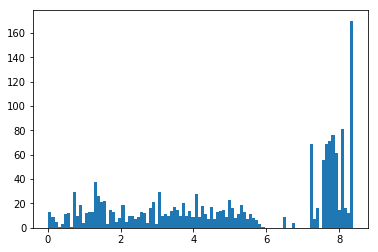

In [14]:
count, bins, _ = plt.hist(moria[sphere].s['age'], bins=100)

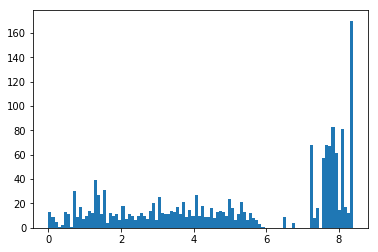

In [15]:
count_s, bins_s, _ = plt.hist(snap[sphere].s['age'], bins=100)

In [16]:
count-count_s

array([ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0., -1.,  1.,  2., -3.,  2.,
       -1.,  1., -1., -1., 10., -9., -1.,  3.,  3., -6.,  2.,  1., -2.,
       -1.,  0.,  1., -1.,  1.,  2., -3.,  2.,  1., -3.,  4., -2.,  0.,
       -1.,  0.,  4., -2., -1., -1.,  1., -1., -1.,  1., -1.,  0.,  2.,
       -2.,  1., -1.,  0.,  0.,  2., -1., -1.,  0.,  2.,  0., -2.,  0.,
        1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0., -1.,
        1.,  4., -7.,  0.,  0.,  0., -1.,  0.,  0.])

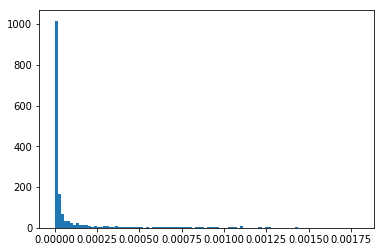

In [17]:
count_mass, _, _ = plt.hist(moria[sphere].s['rho'], bins=100)

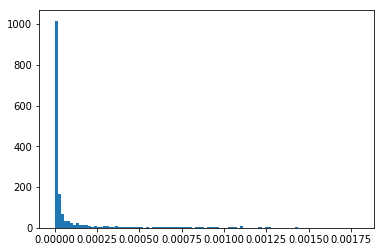

In [18]:
count_mass, _, _ = plt.hist(moria[sphere].s['rho'], bins=100)

In [23]:
from simulation.luminosity import surface_brightness

SimArray([[28.51413 , 28.508217, 28.502335, ..., 27.699959, 27.703724,
           27.7075  ],
          [28.510563, 28.504696, 28.498863, ..., 27.69946 , 27.7033  ,
           27.707153],
          [28.507008, 28.501186, 28.495396, ..., 27.69896 , 27.702877,
           27.70681 ],
          ...,
          [27.921719, 27.918533, 27.91536 , ..., 28.52853 , 28.532654,
           28.536797],
          [27.92899 , 27.9258  , 27.922619, ..., 28.529858, 28.53403 ,
           28.538216],
          [27.93631 , 27.933113, 27.929928, ..., 28.531189, 28.535408,
           28.539642]], dtype=float32, 'arcsec**-2')

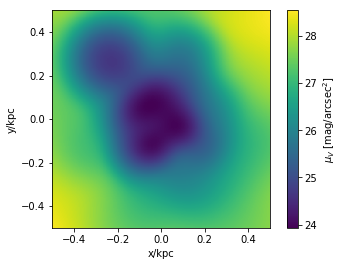

In [24]:
surface_brightness(snap, width=1)

SimArray([[28.583946, 28.57642 , 28.56895 , ..., 27.693855, 27.69812 ,
           27.702396],
          [28.580402, 28.572891, 28.565434, ..., 27.692287, 27.696606,
           27.70094 ],
          [28.576866, 28.56937 , 28.561924, ..., 27.69072 , 27.695091,
           27.699486],
          ...,
          [27.88781 , 27.884846, 27.88189 , ..., 28.48293 , 28.486687,
           28.490456],
          [27.892593, 27.88961 , 27.886635, ..., 28.486   , 28.489758,
           28.49353 ],
          [27.8974  , 27.894394, 27.8914  , ..., 28.489082, 28.49284 ,
           28.496613]], dtype=float32, 'arcsec**-2')

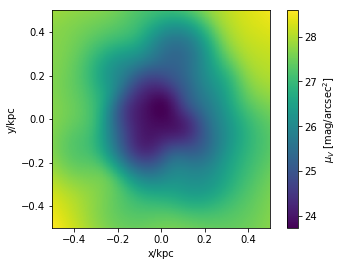

In [25]:
surface_brightness(moria, width=1)